# Veriye Genel Bakis

**Proje Amaci**  
Bir bireyin yillik gelir sinifini elimizdeki degiskenleri kullanarak tahmin etmek.  (Hedef degisken: income)

**Veri Hakkinda Genel Bilgi**  
**age**: Bireyin yasini yil cinsinden ifade eder.  
**fnlwgt**: Her bir satirin temsil ettigi kisi sayisini ifade eder.  
**education**: Bireyin egitim duzeyini ifade eder.    
**education.num**: Bireyin aldigi egitim yilini sayisal olarak ifade eder.  
**marial.statis**: Bireyin medeni durumunu ifade der.  
**occupation**: Bireyin meslegini ifade eder.  
**relationship**: Ailenin icindeki rolu gosterir.(Ornek: Husband,wife gibi,not-in-family gibi)  
**race**: Bireyin etnik kokenini ifade eder.  
**sex**: Bireyin cinsiyetini ifade eder.  
**capital.gain**: Bireyin bir yil icinde elde ettigi sermaye kazancini dolar cinsinden ifade eder. 
**capital.loss**: Bireyin bir yil icinde yasadigi sermaye kaybini  dolar cinsinden ifade eder.  
**hours.per.week**: Bireyin bir haftada calistigi toplam saat sayisini ifade eder.  
**native.country**: Bireyin dogdugu ulkeyi ifade eder. 
**income**: Bireyin yillik gelir durumunu iki siniftan biri olarak ifade eder(<=50K >50K 50.000dolardan esit ve fazla veya 50.000 dolardan az)


Veri hakkinda genel bilgi edinmek icin su fonksiyonlari kullanabiliriz:  

**df.shape** — Verinin satir ve sutun sayisini gosterir.  
**df.dtypes** — Her sütunun veri tipini gösterir.  
**df.head()** — Verinin ilk 5 satirini gosterir.(mesela icine 3 yazarsak ilk 3 satirini gonderir.)  
**df.tail()** — Verinin son 5 satirini gosterir.  
**df.isnull().sum()** — Her sutundaki eksik (null) degerlerin sayisini verir.  
**df.describe().T** — Sayisal sutunlarin ozet istatistiklerini (ortalama, medyan, min, max vb.) satir bazinda gosterir.  
(Ben her verimde bu ozellikleri kullanacagim icin bir fonksiyon uzerinden calistirmayi tercih ettim.)



In [56]:
import warnings
warnings.filterwarnings('ignore') #Kod calisirken uyari mesajlarini gizlemek icin.
import pandas as pd
import pandas as pd
df = pd.read_csv('/Users/Feyza/Downloads/adult.csv')
pd.set_option('display.width',500) #Veriyi daha genis ekranda tam olarak gormek icin
pd.set_option('display.max_columns',None) #Tum sutunlarin eksiksiz olarak gorunmesi icin
def check_df(dataframe,head=5,quantiles=False):
    a=[0, 0.05, 0.50, 0.95, 0.99, 1]
    print("##################### Shape #####################")
    print(dataframe.shape) 
    print("##################### Types ############")
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head (head))
    print("##################### Tail #####################")
    print (dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    if quantiles:
        print(dataframe. describe(a). T)
    else:
        print(dataframe.describe().T)
check_df(df)


##################### Shape #####################
(32561, 15)
##################### Types ############
age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object
##################### Head #####################
   age workclass  fnlwgt     education  education.num marital.status         occupation   relationship   race     sex  capital.gain  capital.loss  hours.per.week native.country income
0   90         ?   77053       HS-grad              9        Widowed                  ?  Not-in-family  White  Female             0          4356              40  United-States  <=50K
1   82   Private  132870       HS-grad              9        Widowed    Exec-managerial  No

Kodlardan elde edindigim bilgiler:  

1-Aslinda eksik veri sayisi sifir gibi gozukse de ? olan yerler eksiktir.  
2-Hedef degiskenimin turu kategorik. Bu yuzden gorsellestirme vb. yerlerde buna dikkat edilmelidir.   
3- Education ve education.num benzer ozelliklere sahip gibi duruyor veride karisiklik olmamasi icin,sayisal degiskenin kalmasi amaciyla educationu silinebilir ama bunun test edilmesi gerekiyor.   
4- Fnlwgt degiskeninin icinde cok fazla sinif var. Bu degiskenin hedef degiskene olan katkisina bakilmali(buyuk ihtimal yok) yoksa da silinmelidir.  
5- Quantiles kismina bakildigi zaman veride asiri degerler ve degiskenlerin dagilimi goz onuna alindiginda karar agaclari ve gradient boosting gibi modeller daha uygun olacaktir.  


Degiskenlerin adlarinda . var ben bu degiskenlerle ugrasirken zorlanmamak icin . olan yerleri _ cevirecegim. .replace(a,b) degiskendeki butun a degerlerini b ye donusturur,

In [57]:
df.columns = df.columns.str.replace('.', '_')
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'], dtype='object')

# Eksik Deger Analizi

Eksik degerlerle basa cikmak icin farkli yontemler vardir: 

En basit yontem, eksik degerleri iceren satirlari **silmektir.** Ancak bu veri kaybina yol acabilir.(Dikkat: Satırların silinmesi, o satırlardaki diğer değişkenlerin de silinmesine ve dolayısıyla bu değişkenlerle ilgili olası bilgi kaybına yol açabilir)  
Alternatif olarak, eksik degerler uygun sekilde **doldurulabilir** (ortalama, medyan veya en sik deger ile). Secilen yontem veri setinin ozelliklerine ve analiz amacina baglidir.

**? Eksik Deger Olarak Sayma**  

Ustte goruldugu gibi eksik degerler NAN ile degil de ? isareti olarak gosterildigi icin eksik degerlerimizin sayisi 0 olarak kabul ediliyor. Bu yuzden once bunlari np.nan ile eksik veri haline getirmemiz gerekiyor.

In [58]:
print('? eksik deger olarak saymadan once')
print(df.isnull().sum())
import numpy as np
df = df.replace("?", np.nan)
print('? eksik deger olarak saydiktan sonra')
print(df.isnull().sum())



? eksik deger olarak saymadan once
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64
? eksik deger olarak saydiktan sonra
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


Goruldugu gibi 3 tane degiskenimiz var. Her degiskeni kendi ozelinde inceleyip eksik degerlere ne yapacagimiza karar vermemiz gerekiyor.

Eksik degerleri daha iyi anlayabilmek icin missingno.matrix() ve seaborn heatmap gorsellestirme yontemlerini kullaninir.

<Axes: >

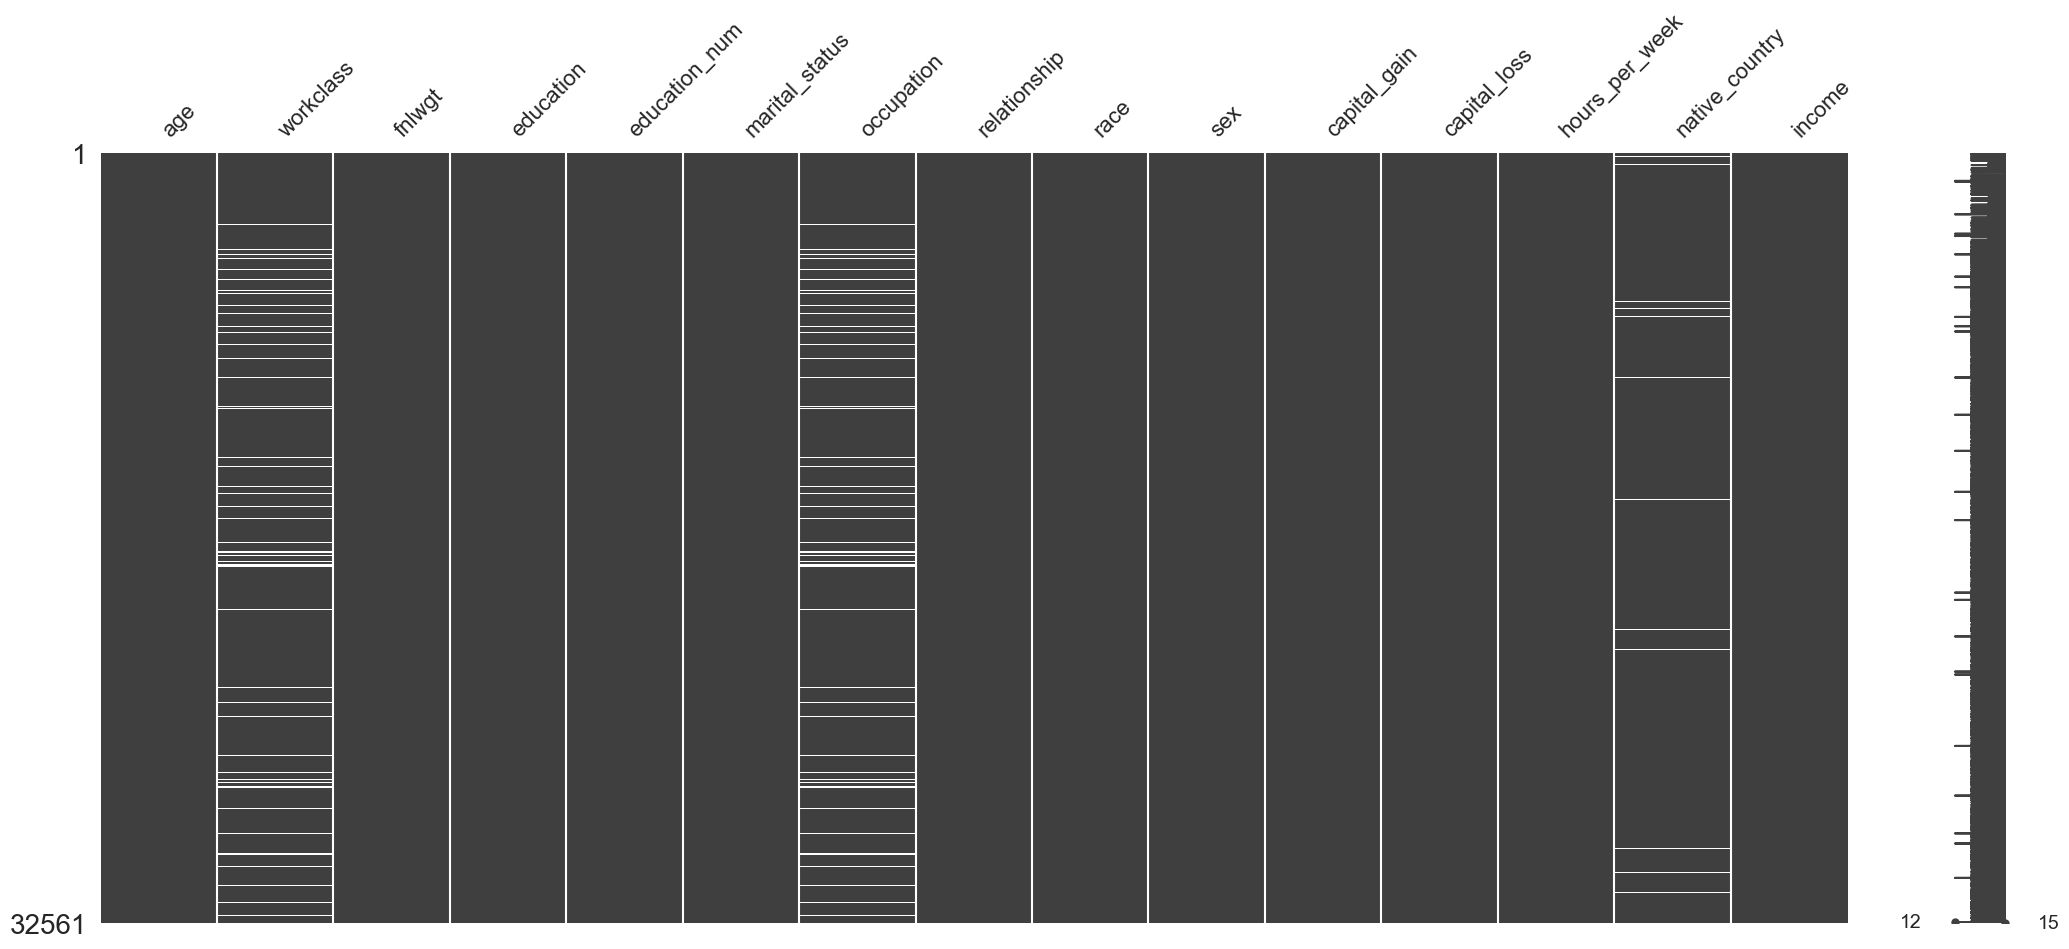

In [59]:
import missingno as msno
msno.matrix(df)

Burada workclass degiskenindeki eksikliklerin oldugu satirda occupationun da eksiklikleri oldugu goruluyor Bu da bu iki değiskenin eksik veri yapisinda (cok buyuk ihtimalle) bir ortaklik oldugunu gosterir.

**workClass**

Ilk olarak hedef degiskenin dagilimina bakalim.

<Axes: xlabel='income', ylabel='count'>

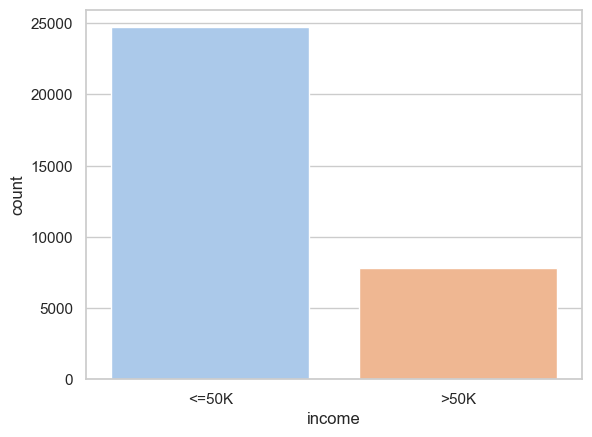

In [60]:
import seaborn as sns
sns.countplot(x='income',data=df,palette='pastel')

Grafige bakilinca 50.000 dolardan fazla alanlarin sayisi 50.000 dolardan az olanlara gore oldukca az gozukuyor bu da 50.000 dolardan az olan satirlar konusunda dikkatli olmamiz o degisken hakkindaki dagilima bakarak silme islemi gerekiyorsa yapmamiz gerektigini gosteriyor. Aksi halde verimiz daha cok dengesizlesebilir.

Hedef degiskenimizdeki dagilimin yuzdeligine sayisal olarak bakalim.

In [61]:
df['income'].value_counts(normalize=True)*100


income
<=50K    75.919044
>50K     24.080956
Name: proportion, dtype: float64

Workclasstaki eksik degerlere silme islemi uygularsak dagilim nasil degisir ona bakalim.

In [62]:
df[df['workclass'].notna()]['income'].value_counts(normalize=True) * 100


income
<=50K    75.101709
>50K     24.898291
Name: proportion, dtype: float64

Hedef degiskenin total yuzdeligi ile workclasss degiskenindeki oranlar neredeyse ayni cok cok kucuk bir fark var. Bu yuzden ben direkt silme islemini kullanmak istiyorum ama son bir adim olarak eksik degerlerimin oldugu satirlar toplam satirlarin yuzde kacini olusturuyor ona bakmam lazim eger cok buyuk bir kismini olusturuyorsa ona gore farkli bir yontem uyguulamaya gecebilirim cunku ustte bahsettigim gibi aslinda diger degiskenleri de silmis oluyorum.

In [63]:
print(f'Workclass degiskenindeki eksik degerlerin totala olan yuzdesi {df['workclass'].isna().sum()/len(df)*100}')


Workclass degiskenindeki eksik degerlerin totala olan yuzdesi 5.638647461687294


Yuzde 5lik oran cok yuksek olmadigi icin silme yontemi uygulanabilir(bana gore). Bu satirlari silersem occupationdaki eksik verilerin de neredeyse tamami silinecektir grafik yardimiyla bu fark edilmisti.

In [64]:
df = df[df['workclass'].notna()]
print('Silinme isleminin kontrolu ve diger eksik degerlere tekrardan bakilmasi icin:')
print(df.isnull().sum())

Silinme isleminin kontrolu ve diger eksik degerlere tekrardan bakilmasi icin:
age                 0
workclass           0
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation          7
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    556
income              0
dtype: int64


Workclass degiskenindeki eksik degerler basariyla silinmis ve ocuupationdaki eksik deger 7 tane kalmis. Bunlari da silmekte sakinca yoktur.

**occupation**

In [65]:
df = df[df['occupation'].notna()]
print('Silme isleminin kontrolu:')
print(df.isnull().sum())

Silme isleminin kontrolu:
age                 0
workclass           0
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation          0
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    556
income              0
dtype: int64


**native_country**

Bunda da ilk olarak silme islemine bakmak icin Workclass degiskeninde uygulanilan yontemi buna da uygulayacagim.

Hedef degiskenin dagilimi

In [66]:
df['income'].value_counts(normalize=True) * 100


income
<=50K    75.096035
>50K     24.903965
Name: proportion, dtype: float64

native_country degiskenindeki eksik degerleri silinmesi durumunda hedef degiskenin dagilimi

In [67]:
df[df['native_country'].notna()]['income'].value_counts(normalize=True) * 100


income
<=50K    75.107751
>50K     24.892249
Name: proportion, dtype: float64

Bunda da cok yakin bir deger cikti. Aslinda bu son degiskende bu beklenilebilir cunku toplam satir uzunlugunun yaninda 500 eksik deger sayisi biraz az. Yine de aslinda eksik degerlerin genel orana benzer sekilde olmasinda da buyuk fayda var. Bunu da kanitlayalim.

Eksik degerlerin hedef degisken dagilimi

In [68]:
df[df['native_country'].isna()]['income'].value_counts(normalize=True) * 100


income
<=50K    74.460432
>50K     25.539568
Name: proportion, dtype: float64

Bu yuzden 3.degiskenimde de silme islemini uygulayacagim.

In [69]:
df = df[df['native_country'].notna()]
print('Tum veride eksik deger kontrolu')
print(df.isnull().sum())

Tum veride eksik deger kontrolu
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


Simdi basta satir satim 32.561di. Silme isleminden sonra kalan sayi:

In [70]:
print(f'Basta satir sayisi 32.561di. Silme isleminden sonra kalan sayi:{len(df)}')

Basta satir sayisi 32.561di. Silme isleminden sonra kalan sayi:30162


**Aykiri Gozlem Analizi**

Boxplot grafiği, verideki aykırı gözlemleri kolayca gormemizi saglar. Kutu disindaki noktalar, siradisi degerleri yani aykiri gozlemleri temsil eder. Boylece veri dagilimindaki uc degerleri hizlica fark edebiliriz. x=df['sutunadi'] diyerek, grafikte göstermek istedigimiz veri sütunundaki degerleri belirtiyoruz. Sayisal sütunlarda kullaniriz cunku aykiri degerler ancak sayisal veride anlamli olur.

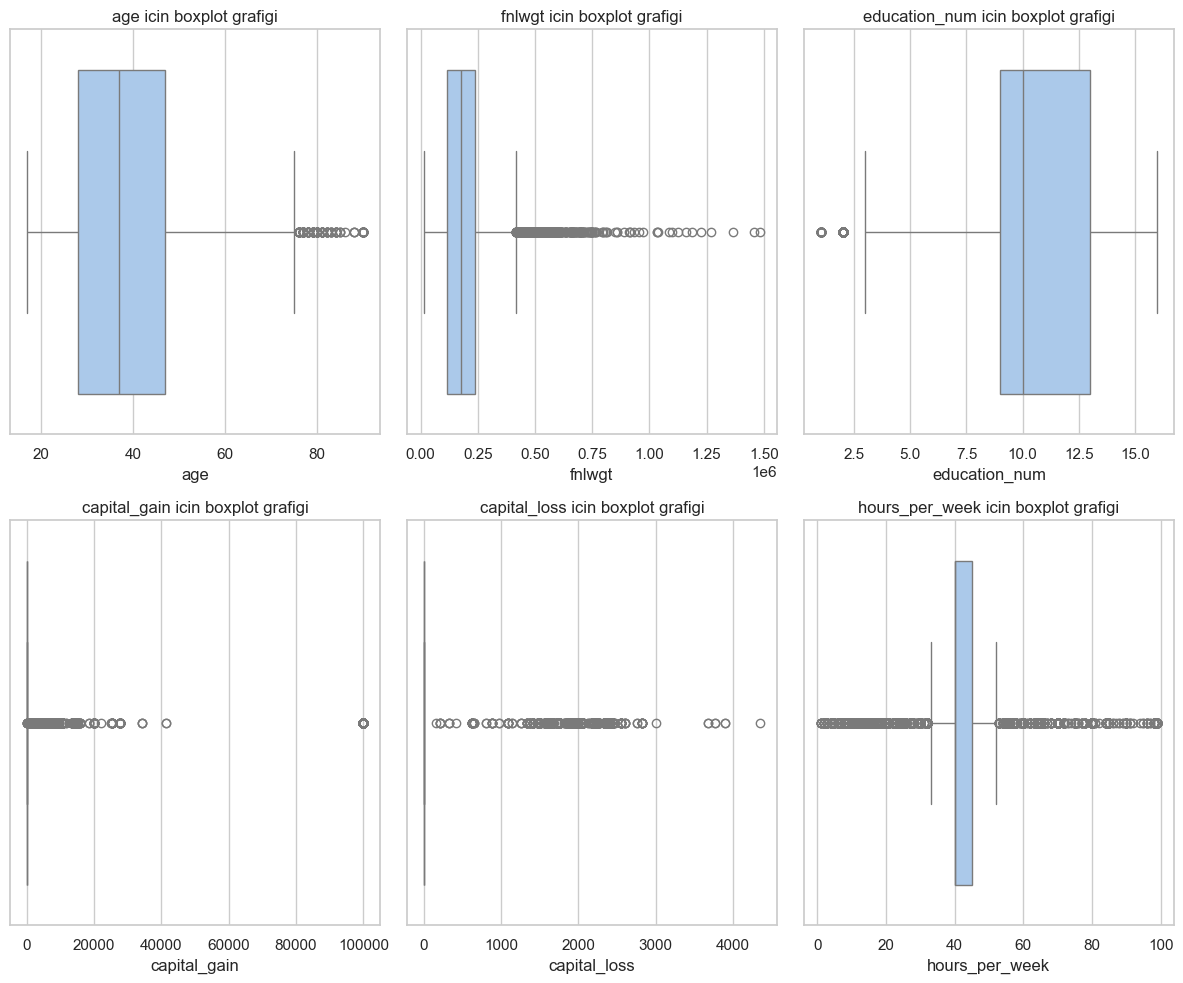

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
import math
n = len(num_cols) #Sayisal sutunlarin sayisi

cols = 3 #Grafiklerde sutun sayisini 3 olarak belirledim 6 tane degisken oldugu icin
rows = math.ceil(n / cols) #satir sayisini hesapla.

plt.figure(figsize=(12, 5 * rows)) #Grafik alaninin boyutu genislik 12 yukseklik satir sayisina gore

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols,i)
    sns.boxplot(x=df[col],palette='pastel') 
    plt.title(f'{col} icin boxplot grafigi', fontsize=12)
    plt.tight_layout()

plt.show()



(Goruntude uclu olarak gozukmesi icin yapay zekadan yardim aldim.)

Bu verimde aykiri degerlerin olduugu hatta bazi degiskenlerde(hours_per_week) gibi cok fazla oldugunu gosteriyor ama Random Forest ve Gradient Boosting gibi agac tabanli modellerde aykiri degerler modeli genelde etkilemez. Bu yuzden normalize etmeye veya aykiri degerleri silmeye cogunlukla gerek yoktur.

# Veri Gorsellestirme

(Gorsellestirme de hepsi tek bir yerde gozuksun diye(subplot) kodumu yapay zekaya verip konumlarini ayarlamasini istedim.)

## Sayisal Degiskenler

Korelasyon, iki degisken arasindaki iliski veya baglantinin gucunu ve yönünü ifade eder. Pozitif korelasyonda bir degisken artinca digeri de artar, negatif korelasyonda ise biri artarken digeri azalir. Sayisal degiskenler arasindaki bu iliskiyi renklerle gosteren grafiklere korelasyon (isi) haritasi denir. heatmap fonksiyonu, bu korelasyon matrisini renkli tablo olarak cizer. annot=True parametresi, her kare icine korelasyon degerlerinin yazilmasini saglayarak sayilari da görmemizi sağlar.

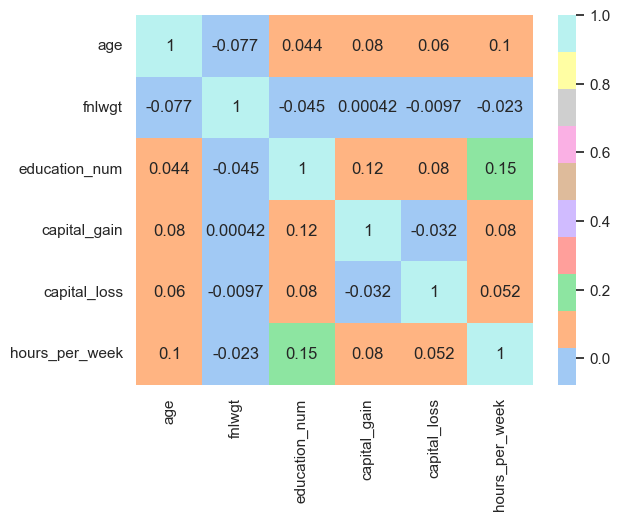

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.select_dtypes(include=[int, float]).corr()
cmap = sns.color_palette("pastel", as_cmap=True) #rengi pastel donlarda gormek istedigim icin
sns.heatmap(corr, annot=True, cmap=cmap)
plt.show()




Grafige bakarsak sayisal degiskenlerin birbirleri arasinda kolerasyonun neredeyse hic olmadigini goruruz.

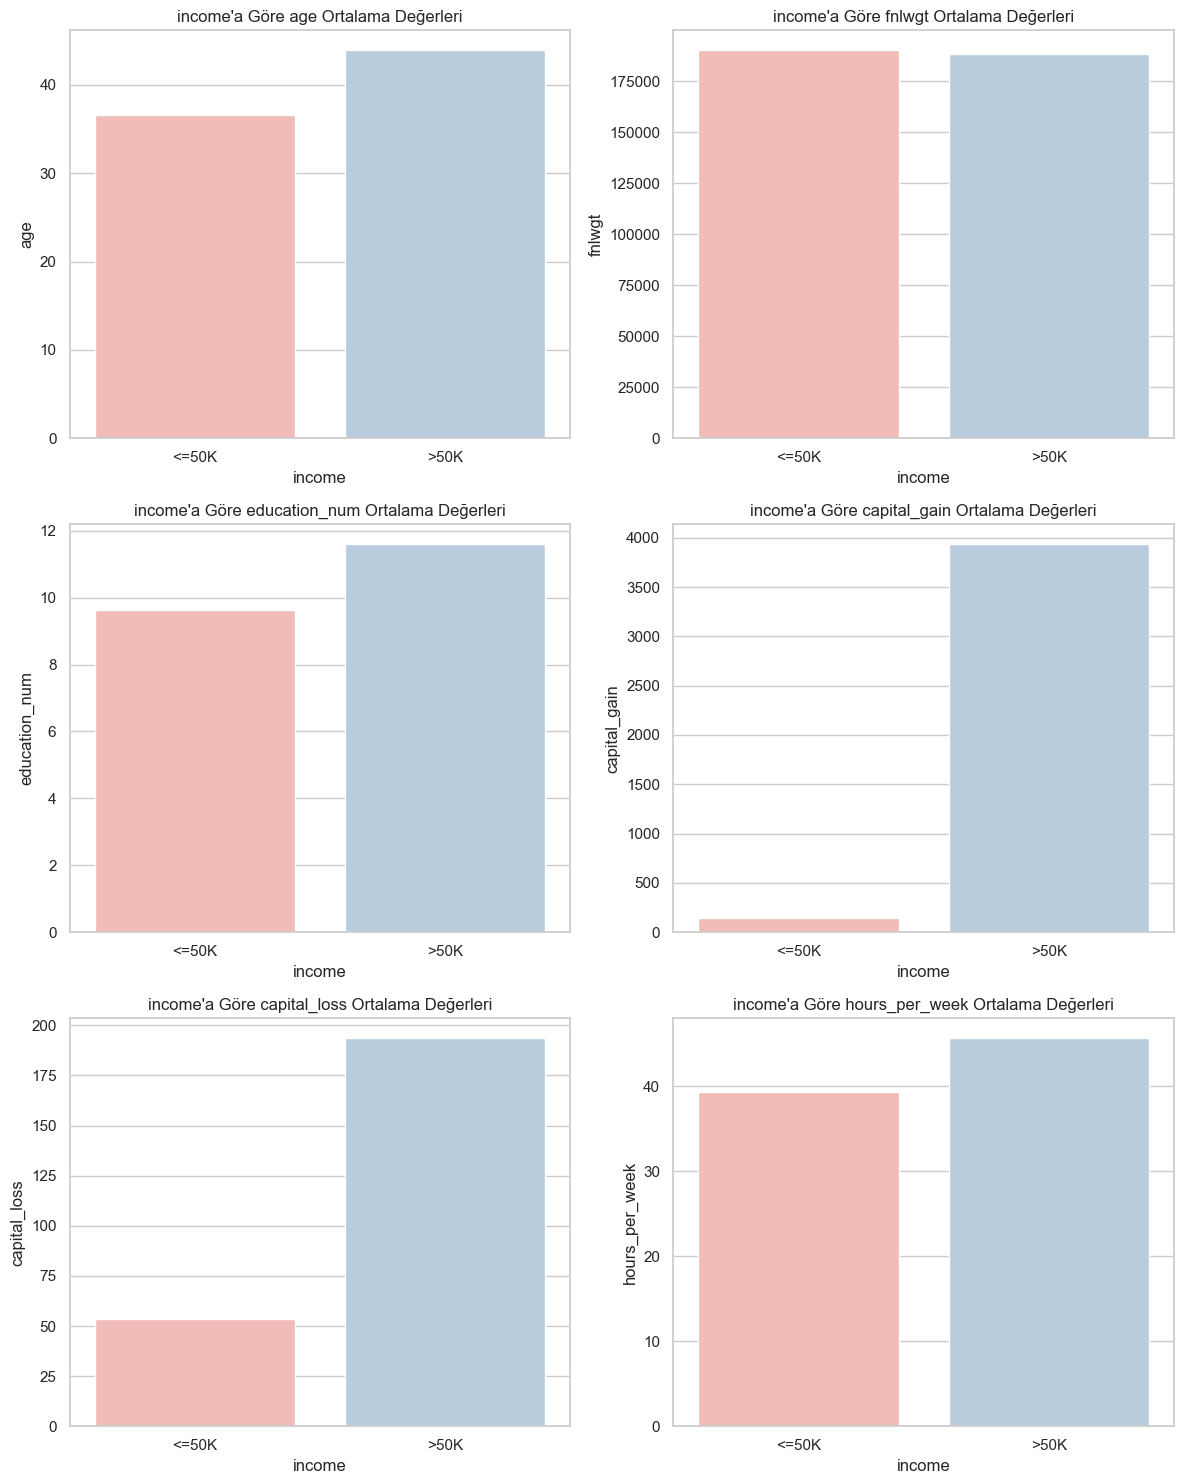

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols=df.select_dtypes(include=[int,float]).columns

fig, axes = plt.subplots(3, 2, figsize=(12, 15))  # 3 satır, 2 sütun grafik alanı

for i, col in enumerate(num_cols):
    means = df.groupby('income')[col].mean().reset_index()
    sns.barplot(x='income', y=col, data=means, palette='Pastel1', ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"income'a Göre {col} Ortalama Değerleri")

plt.tight_layout()
plt.show()


Grafiklerde en dikkatimi ceken fnlwgt degiskeni oldu.Fnlwgt degiskeninde,hedef degisken kiriliminda ortalama neredeyse ayni. Ayrica fnlwgt degiskeninin benzersiz sinif sayisi diger sayisal degiskenlere gore cok fazla.

In [74]:
print(f' fnlwgt degiskeninde benzersiz sinif sayisi {df['fnlwgt'].nunique()}')

 fnlwgt degiskeninde benzersiz sinif sayisi 20263


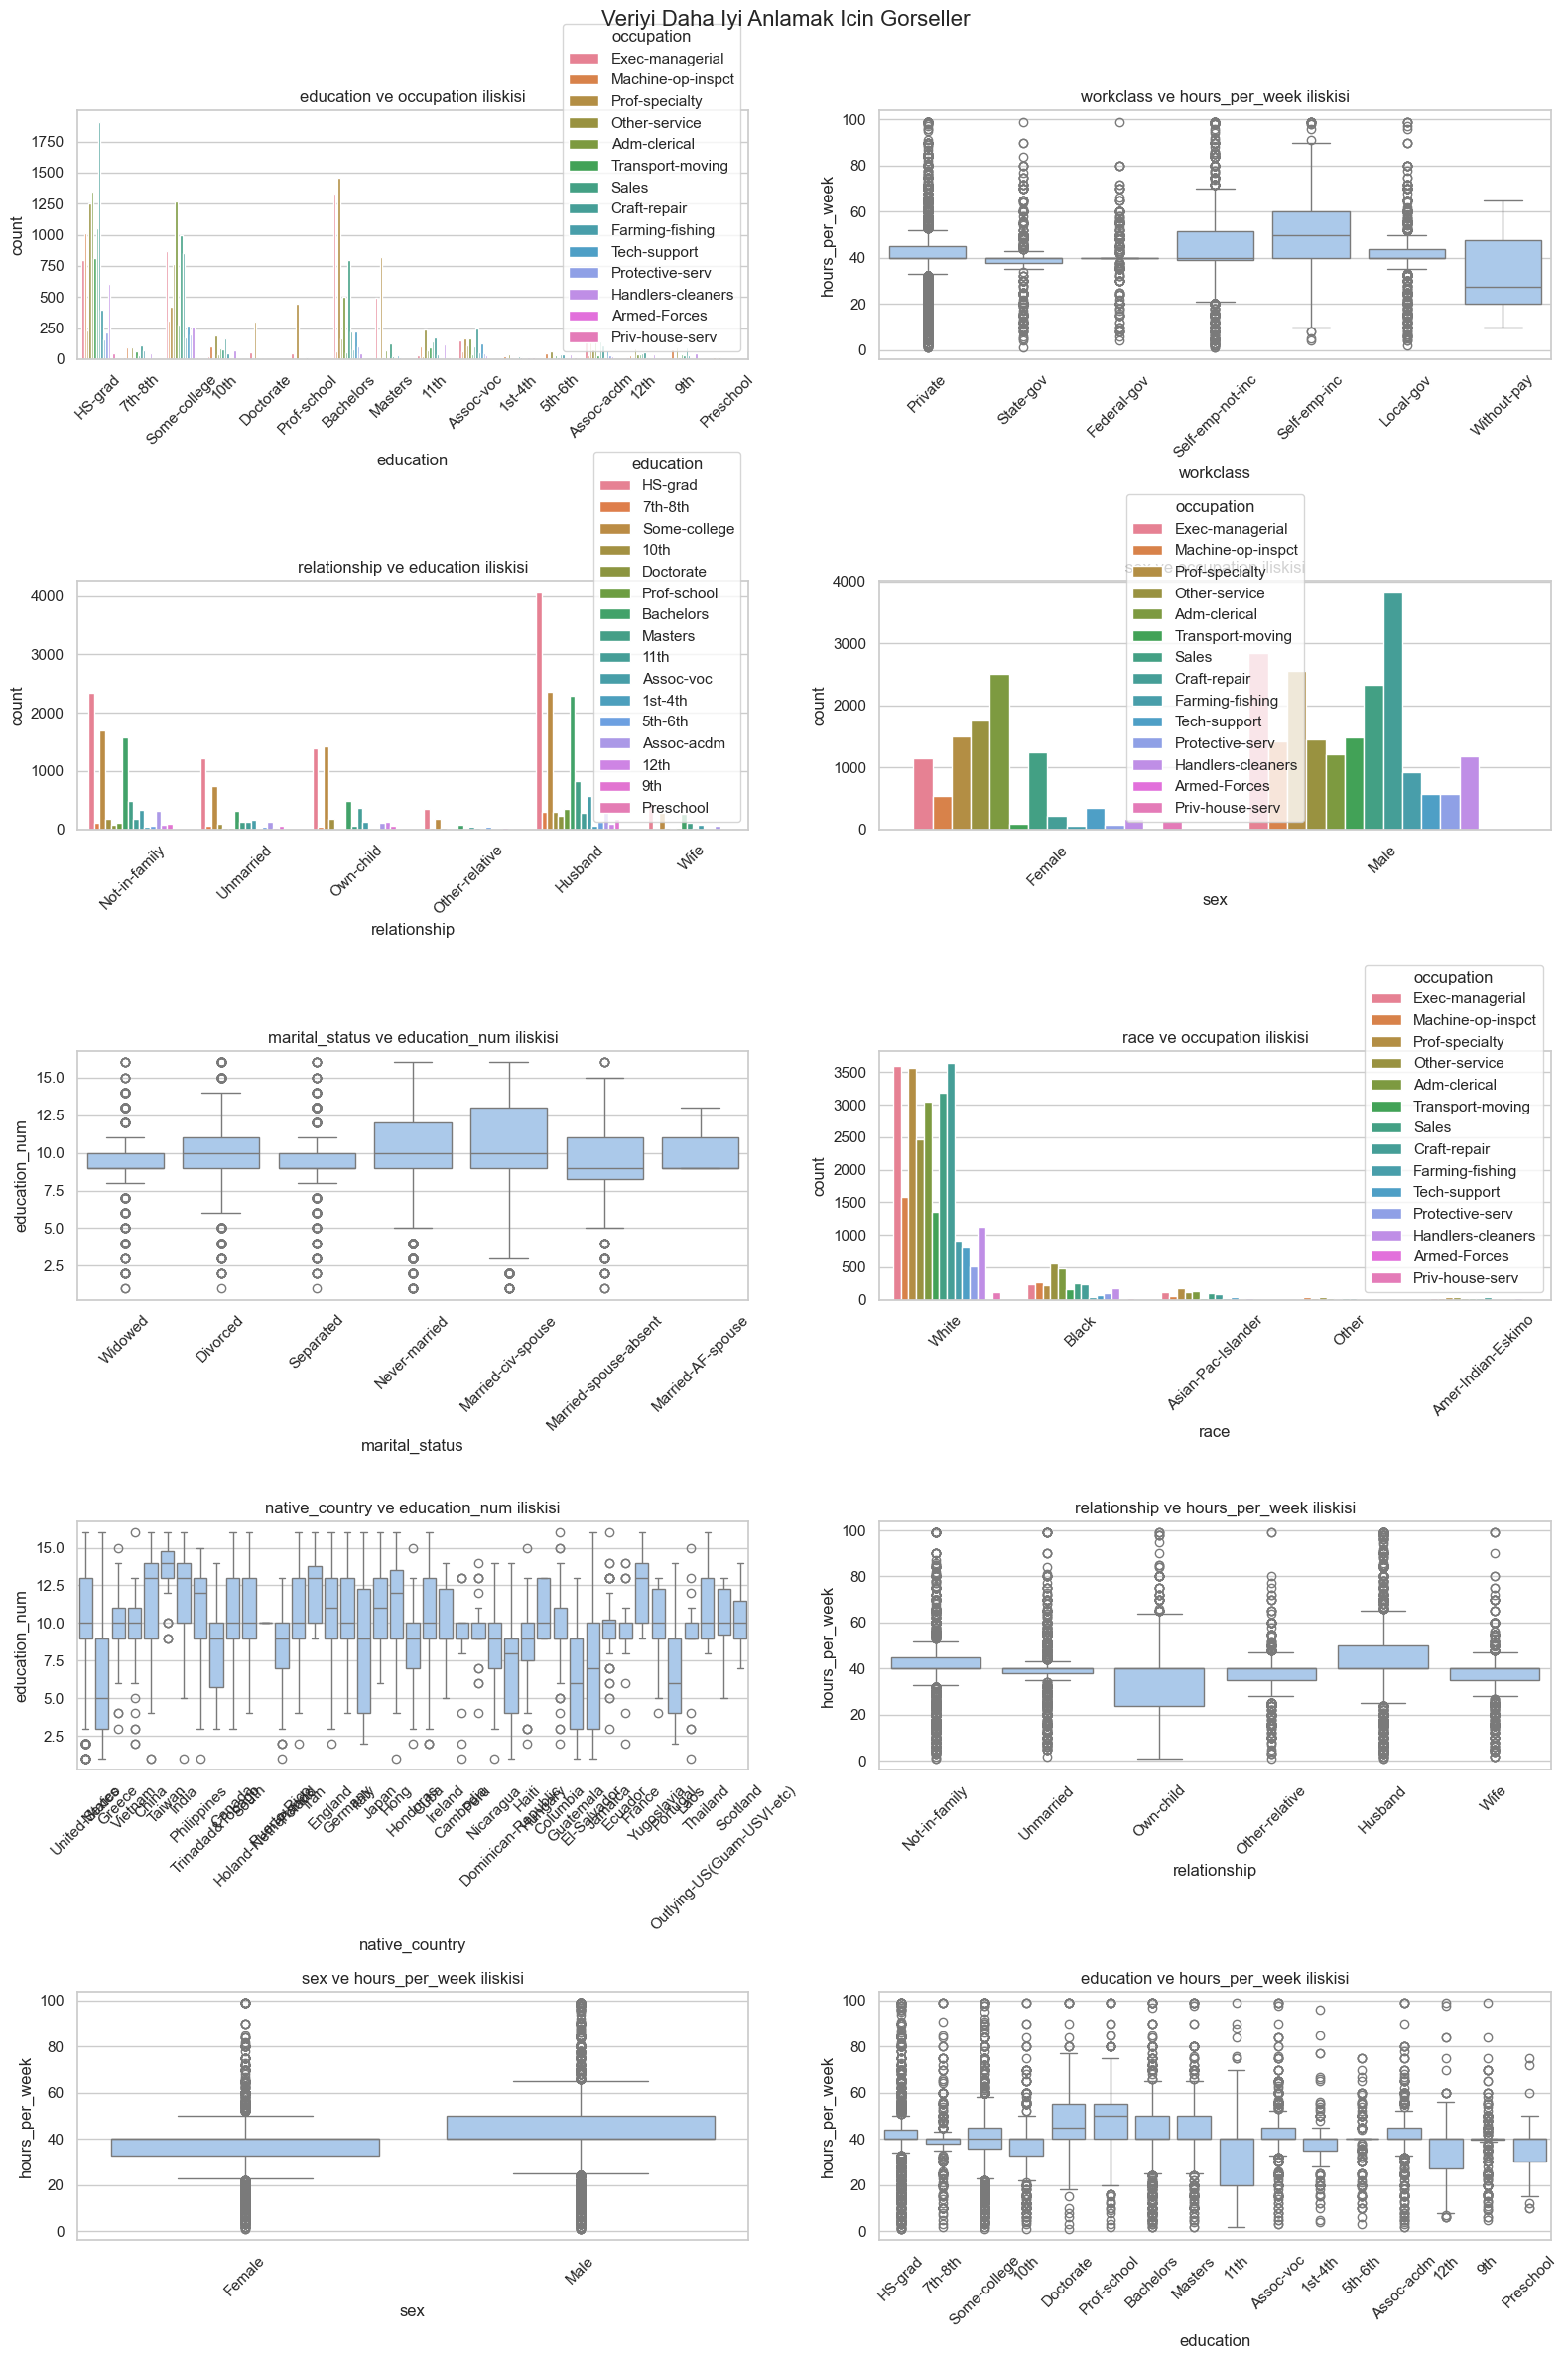

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette='pastel')

# Veiiyi daha iyi anlamak icin degiskenlerin birbiri arasindaki iliskileri anlamamiz lazim. Bu yuzden bazi ikili degiskenler olusturdum arasindaki iliskilere bakmak icin.
plot_pairs = [
    ('education', 'occupation'),
    ('workclass', 'hours_per_week'),
    ('relationship', 'education'),
    ('sex', 'occupation'),
    ('marital_status', 'education_num'),
    ('race', 'occupation'),
    ('native_country', 'education_num'),
    ('relationship', 'hours_per_week'),
    ('sex', 'hours_per_week'),
    ('education', 'hours_per_week')
]

cols = 2 #Bir satirda kac grafik oldugu
rows = (len(plot_pairs) + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(16, 5 * rows))
fig.suptitle('Veriyi Daha Iyi Anlamak Icin Gorseller', fontsize=16)


#Her ikili degisken icin liste olusturalim.
for i, (x, y) in enumerate(plot_pairs):
    r = i // cols
    c = i % cols
    ax = axes[r][c] if rows > 1 else axes[c]

    # y kategorikse countplot, sayisalsa boxplot grafigi olsun.
    if df[y].dtype == 'object':
        sns.countplot(x=x, hue=y, data=df, ax=ax)
    else:
        sns.boxplot(x=x, y=y, data=df, ax=ax)

    ax.set_title(f'{x} ve {y} iliskisi', fontsize=12)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.97]) #Grafiklerin birbirine veya ust basliga cok yaklasmadan duzgunce yerlesmesi icin
plt.show()


Bu yuzden makine ogrenmesinde veryi hazirlarken bu degiskeni cikartacagim.

## Kategorik Degiskenler

Kategorik degiskenler icin pasta ve cubuk grafikler:
Pie chart kategorik degiskenlerin yuzdelik dagilimini verir.
Countplot hedef degiskene gore kategorik sinif sayilarini gosterir.
Renkler kategorileri ve hedef gruplari ayirt etmek icin kullanilir.
Bunlar kategorik degiskenlerin hedefle iliskisini anlamaya yardimci olur.

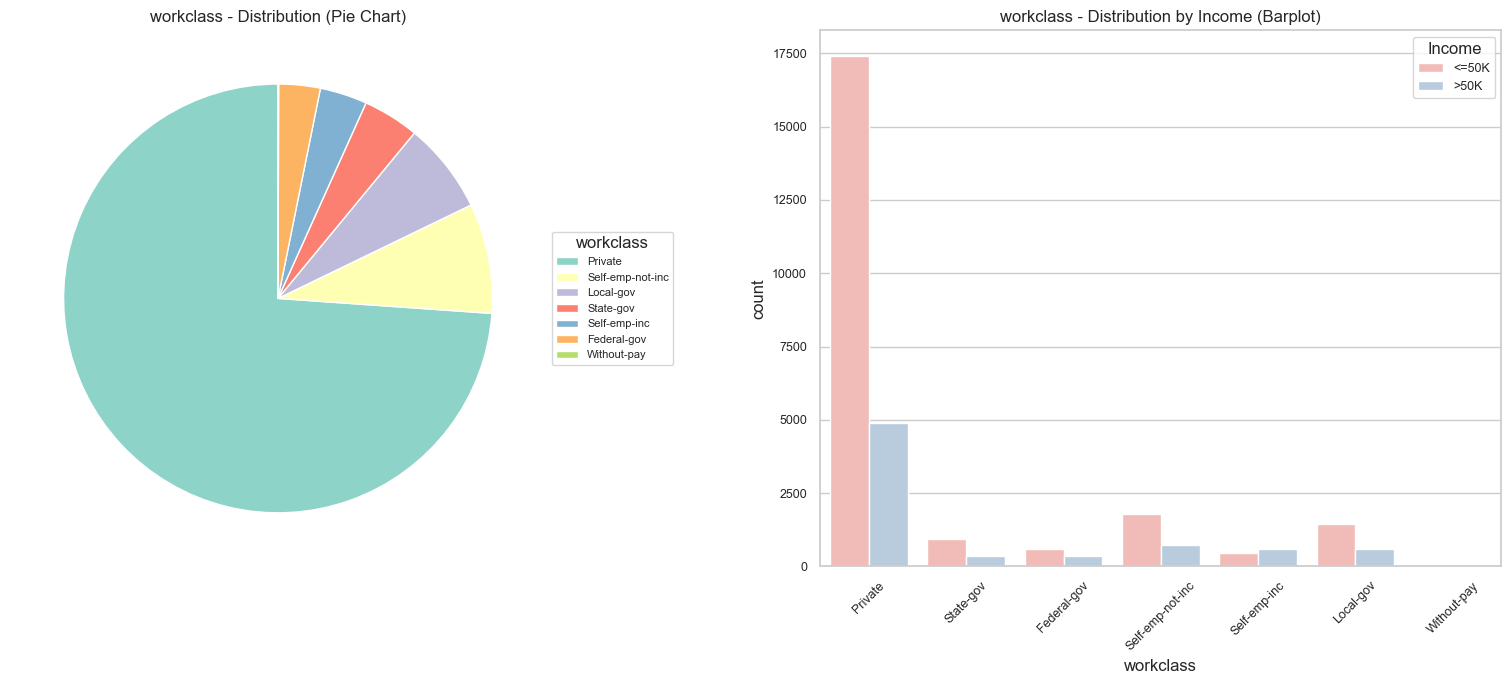

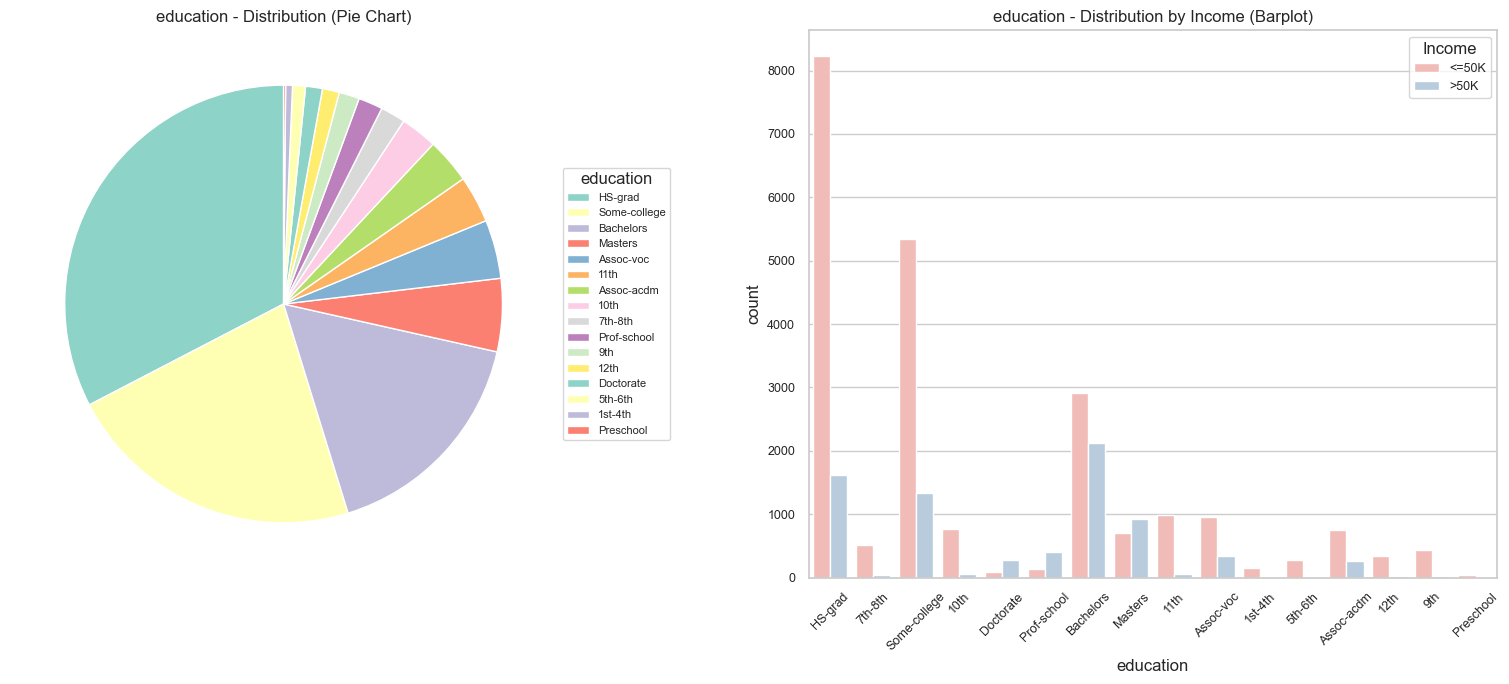

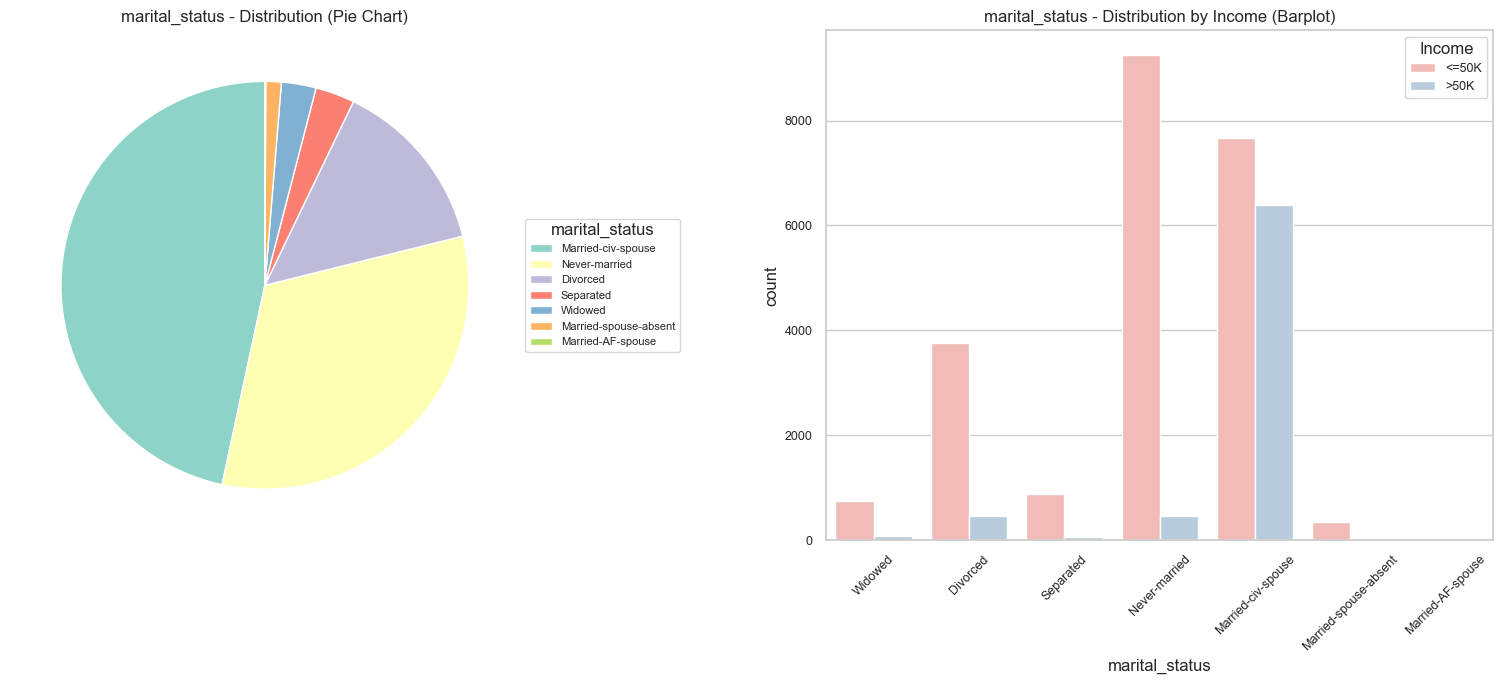

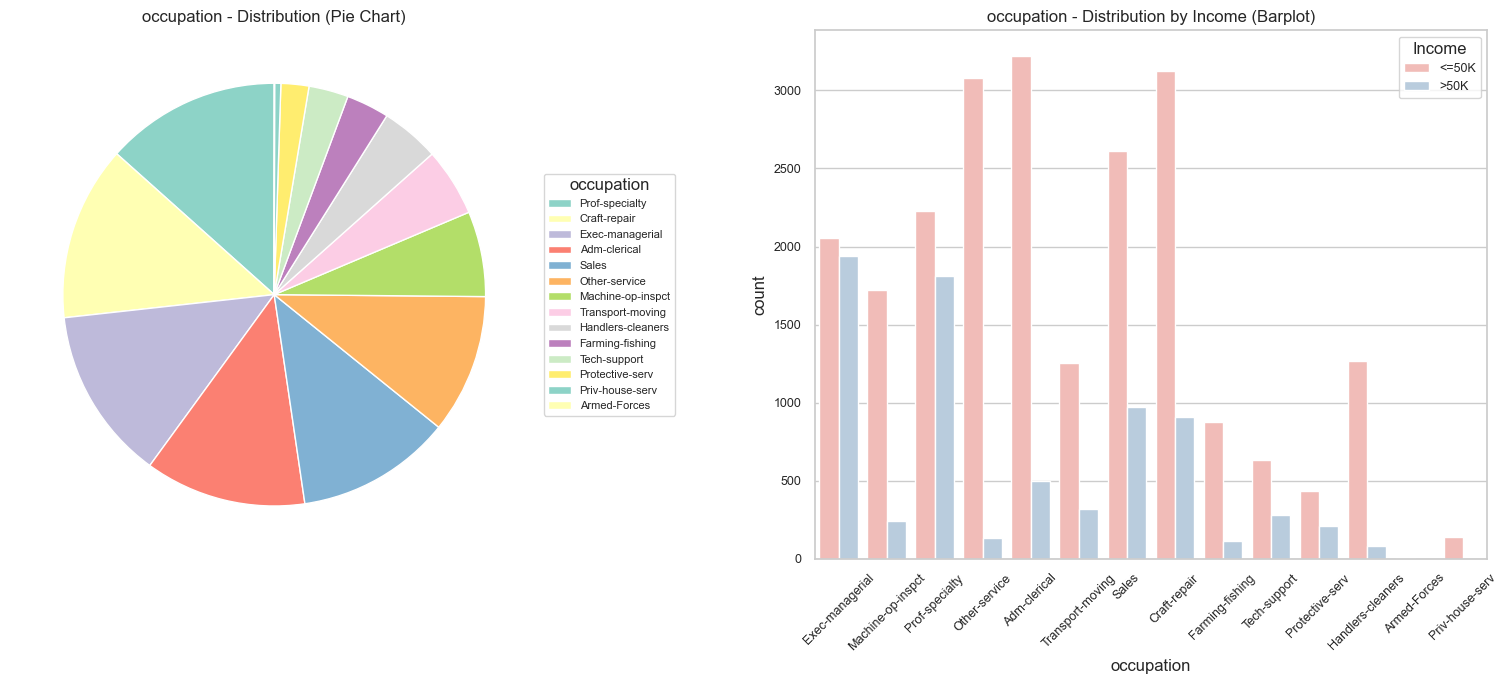

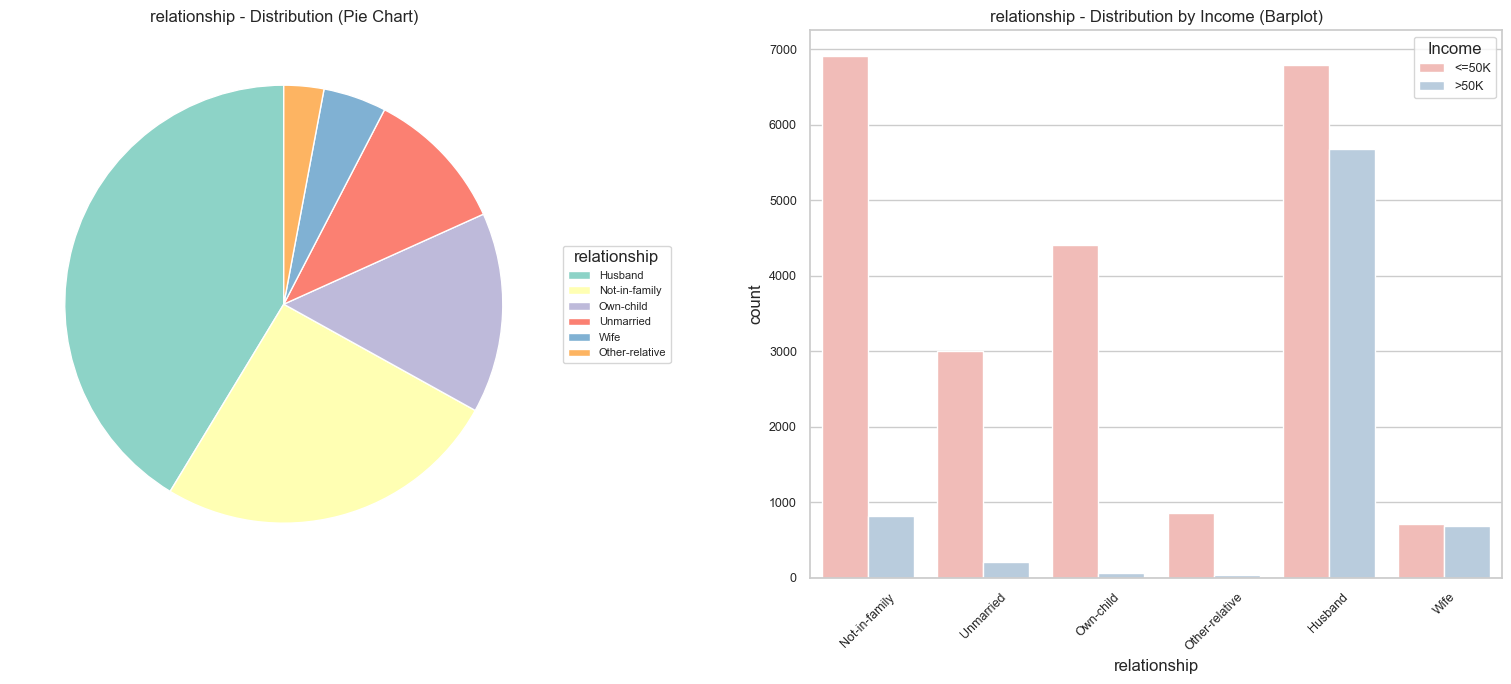

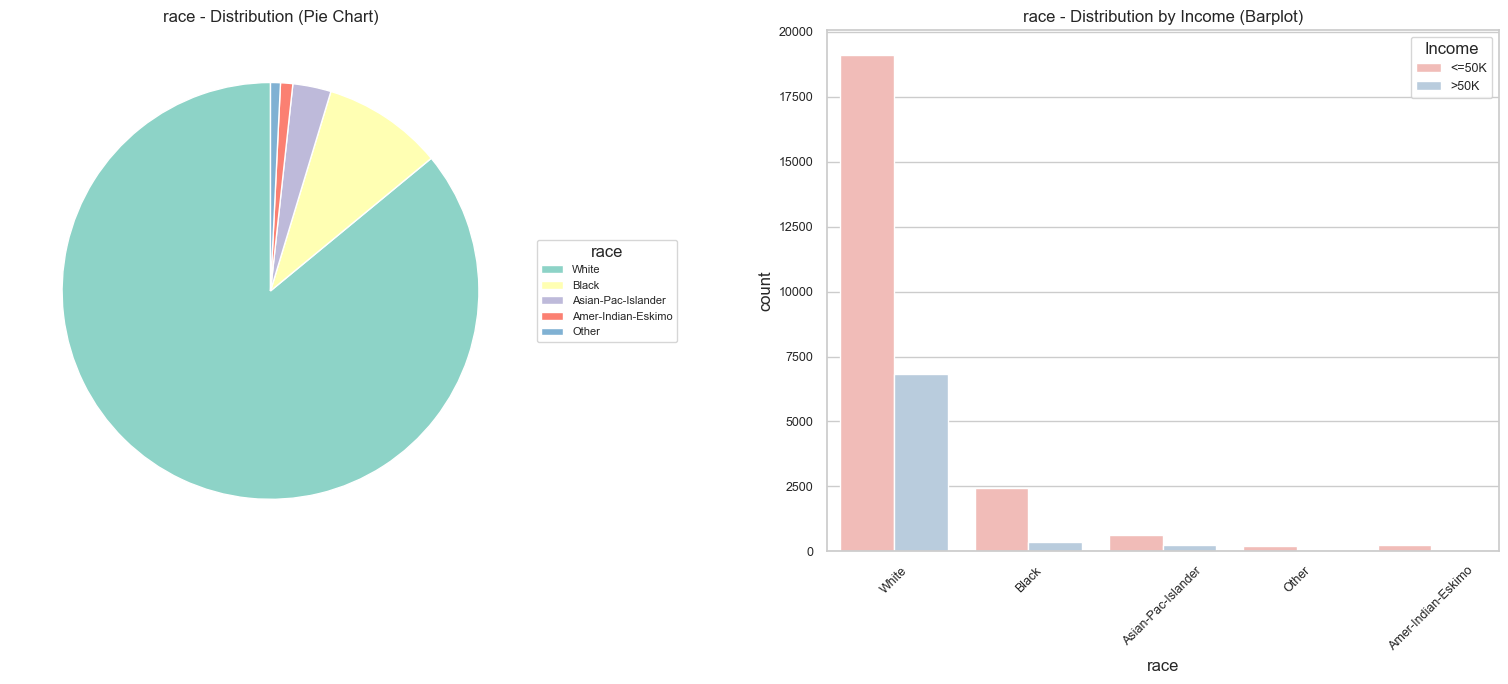

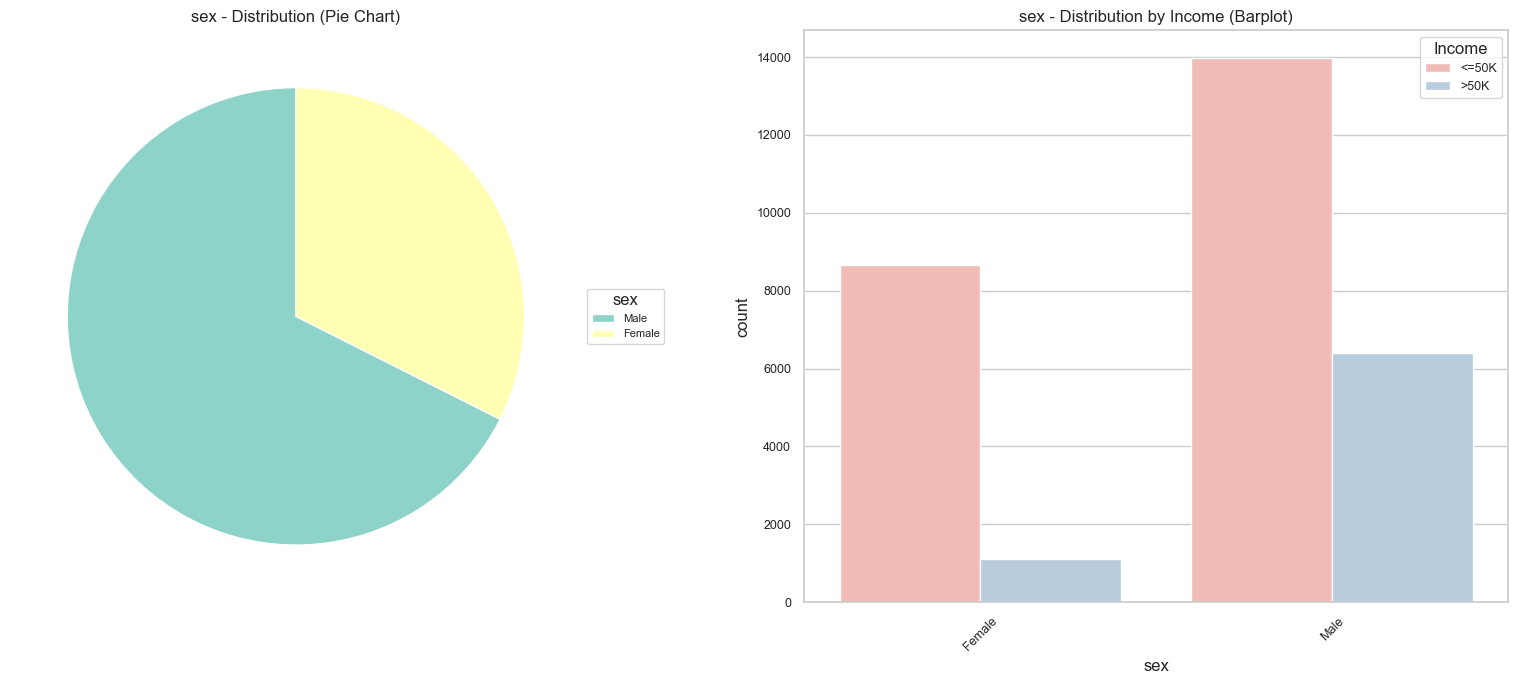

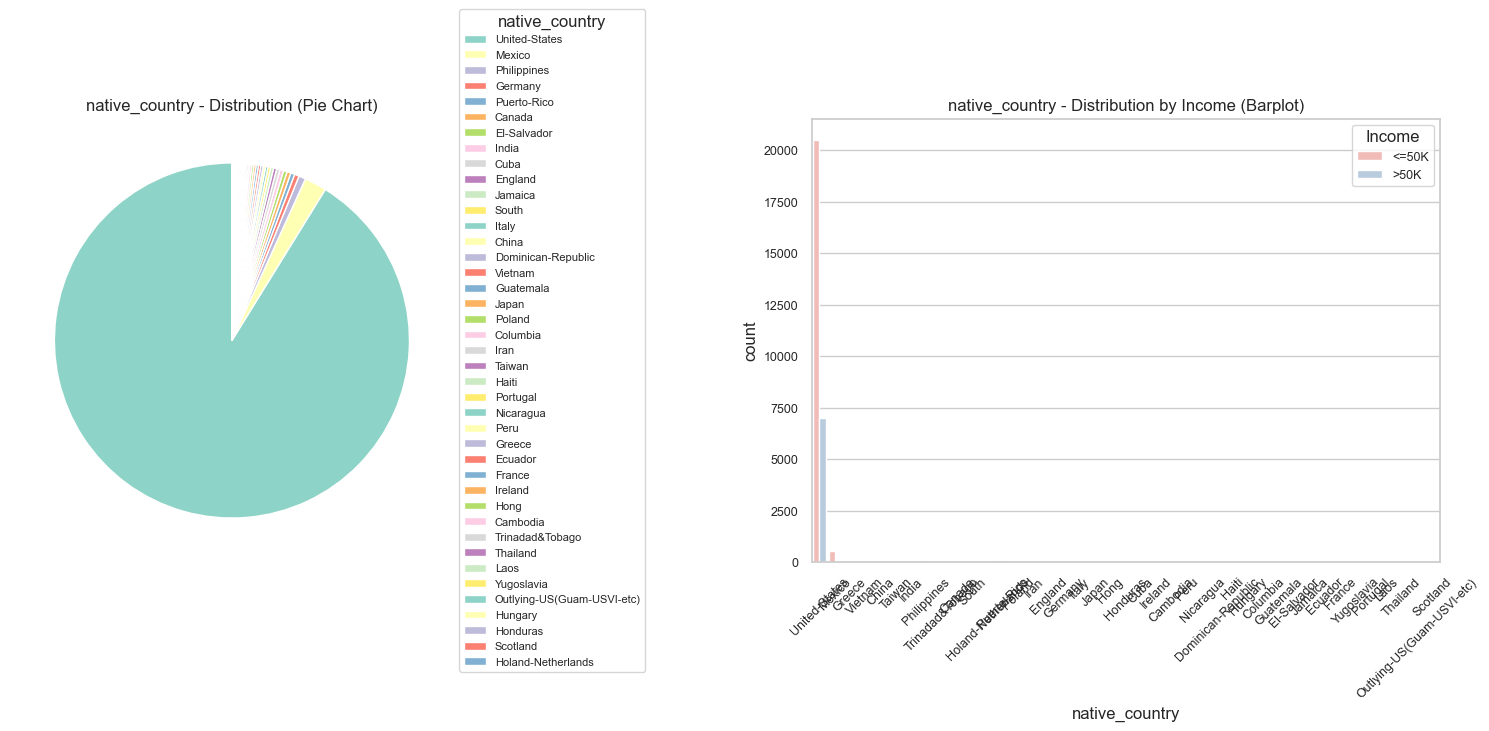

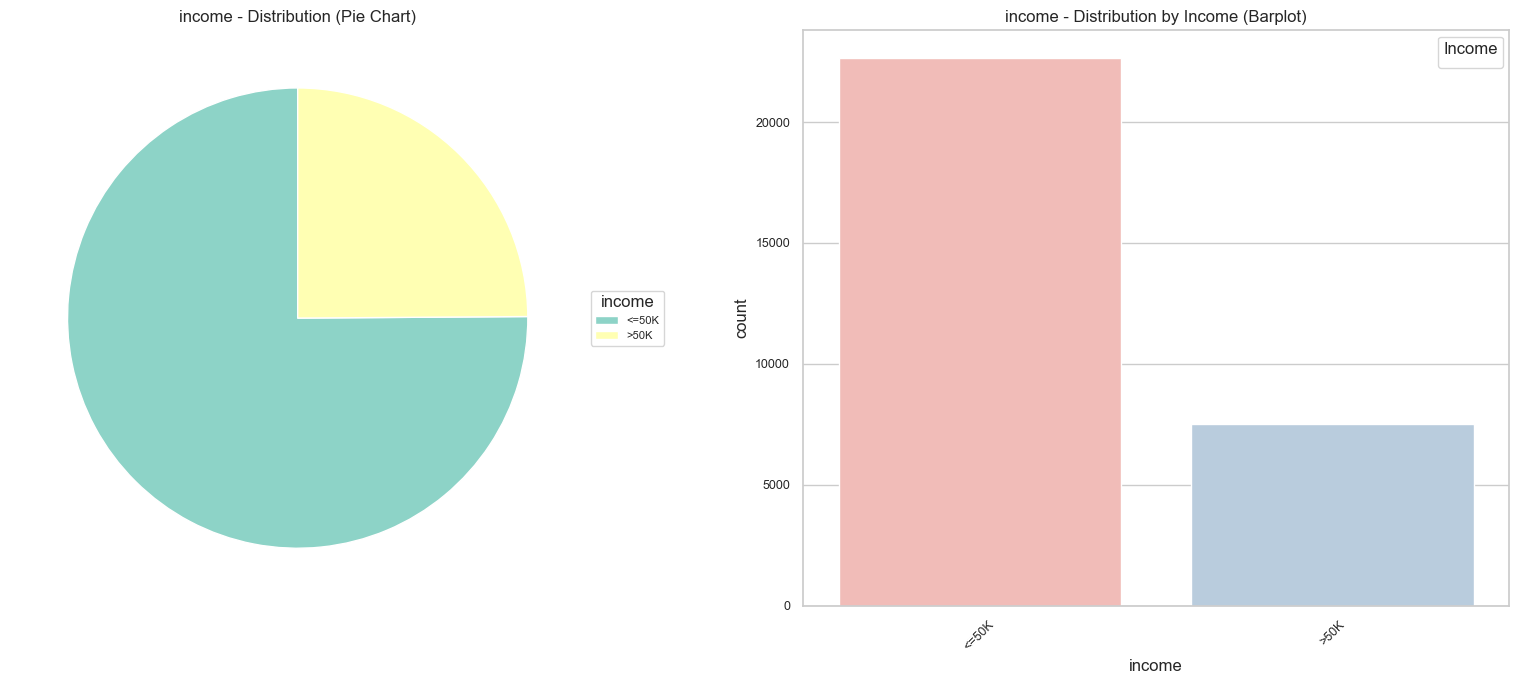

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = df.select_dtypes(include=['object','category']).columns

for col in cat_cols:
    fig, axs = plt.subplots(1, 2, figsize=(16, 7))

    counts = df[col].value_counts() #O sutundaki her kateogri icin frekans sayisini al.
    colors = sns.color_palette('Set3', len(counts))
    wedges, texts = axs[0].pie(
        counts, #Her dilimin buyuklugu o kategorinin frekansina bagli.
        startangle=90, #Pasta grafiginin baslangic acii
        textprops={'fontsize': 9}, #Pasta uzerindeki yazilarin boyutu
        colors=colors
    ) #pasta grafigi olsutur

#Grafigin yaninda ahngi renk hangi kategoriye ait aciklamasi yapmak icin alttaki iki satiri yazdik.
    axs[0].set_title(f'{col} - Distribution (Pie Chart)', fontsize=12)
    axs[0].legend(wedges, counts.index, title=col, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=8)
#wedges: dilim renkleri, count.index:kategorilerin isimleri title=col: Legend basligi olarak sutun adi loc=#legendin yerlesimi bbox_to_ancho grafik alaninin biraz diisna koyarak yerlestirilmesi
    sns.countplot(x=col, hue='income', data=df, ax=axs[1], palette='Pastel1')
#hue=income hedef degiskene gore renk ayari
    axs[1].set_title(f'{col} - Distribution by Income (Barplot)', fontsize=12)
    axs[1].tick_params(axis='x', rotation=45, labelsize=9)
    axs[1].tick_params(axis='y', labelsize=9)
    axs[1].legend(title='Income', fontsize=9)

    plt.tight_layout()
    plt.show()


Burada da dikkatimi race ve native_country dikkatimi cekti hem benzersiz sinif sayisi cok hem de ikisi de tek bir sinifta yogunlasmis. Bu yuzden bu iki degiskeni de silecegim.

# Model Secimi ve Veriyi Modele Gore Hazirlama

# Model Secimi

Gelir bilgisi iki siniftan olustugu icin bu bir siniflandirma problemi. Bu nedenle dogrusal modeller yerine daha guclu algoritmalar kullanmayi tercih ettim. Random Forest ve Gradient Boosting, ozellikle dengesiz dagilimlarda ve karmasik yapilarda cok basarili oldugu icin bu modelleri sectim.

Random Forest ve Gradient Boosting ikisi de topluluk (ensemble) yontemleridir. Random Forest daha hizli calisir ve yorumlamasi daha kolaydir, ancak Gradient Boosting genellikle daha yuksek tahmin dogrulugu saglar cunku her agac bir oncekinin hatalarini duzeltmeye calisir

## Veriyi Modele gore ayarlama

**Emin Oldugum Degiskenleri Silme**

Simdi ilk olarak veri gorsellestirme sonucu cikartmayi dusundugum 3 degisken var: **fnlwgt,race,native_country**   

Emin olmadigim da bir degisken var: **education**. Bu degiskenin education_num ile dogrusal bir iliski olup olmamasina gore silecegim.

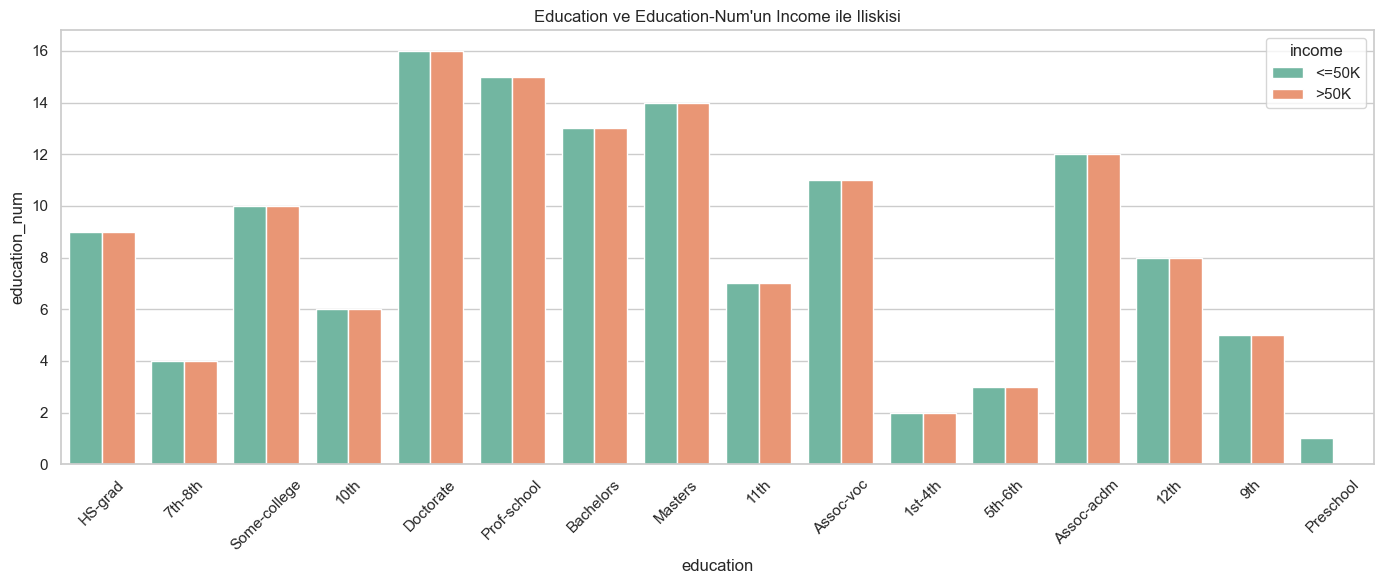

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='education', y='education_num', hue='income', palette='Set2')

plt.xticks(rotation=45)
plt.title("Education ve Education-Num'un Income ile Iliskisi")
plt.tight_layout()
plt.show()


Grafikte de goruldugu gibi birbirleri arasinda kolerasyon neredeyse %100. O yuzden bunun da silinmesi daha mantikli olur.

In [78]:
df.drop(['race','native_country','fnlwgt','education'],axis=1,inplace=True)

Bu kod veriden belirtilen sutunlari **kalici** olarak silmeyi saglar.  
**‘axis=1’** sutunlari secmek icin, **‘inplace=True’** degisikligi dogrudan df uzerinde yapmak icindir.

**Kategorik Degiskenleri Donusturme**

Makine öğrenmesi modellerinde, kategorik verilerin sayısal forma dönüştürülmesi gereklidir; bu dönüşüm, verinin nominal veya ordinal olmasına göre uygun yöntemlerle yapılır. Nominal veriler için genellikle One-Hot Encoding gibi sıralama içermeyen yöntemler tercih edilirken, ordinal verilerde ise kategoriler arasındaki doğal sıralamayı koruyan Ordinal Encoding veya Target Encoding gibi yöntemler kullanılır.

Agac tabanli modeller (**Random Forest, Gradient Boosting)** icin kategorik degiskenlerde **Label Encoding** genellikle yeterlidir. Bu modeller sayisal etiketleri iyi isler ve One-Hot Encoding gibi karmaşik donusumlere gerek yoktur. Bu yontem hem verimliligi artirir hem de iyi performans saglar.

Simdi kategorik degiskenlerimi tekrar secip onlari labelEncoder ile sayisallastiracagim.

In [79]:
from sklearn.preprocessing import LabelEncoder
cat_cols=df.select_dtypes(include='object').columns
le = LabelEncoder()
for cat_col in cat_cols:
    df[cat_col] = le.fit_transform(df[cat_col])

Bu kod, kategorik (metin) sütunlardaki her farklı değeri sayısal bir etikete dönüştürür; böylece makine öğrenmesi modelleri bu veriyi kullanabilir.

Simdi verimi test verisine bolmeden onca sayisal olmayan degiskenim kalmis mi onu komtrol edecegim.

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   workclass       30162 non-null  int64
 2   education_num   30162 non-null  int64
 3   marital_status  30162 non-null  int64
 4   occupation      30162 non-null  int64
 5   relationship    30162 non-null  int64
 6   sex             30162 non-null  int64
 7   capital_gain    30162 non-null  int64
 8   capital_loss    30162 non-null  int64
 9   hours_per_week  30162 non-null  int64
 10  income          30162 non-null  int64
dtypes: int64(11)
memory usage: 2.8 MB


Verim artik makine ogrenmesi icin hazir hale geldi.

# Makine Ogrenmesi

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import pandas as pd
X = df.drop('income', axis=1)
Y = df['income']
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25, random_state=16)

Veriyi modelin ogrenecegi ozellikler (X) ve tahmin edecegimiz hedef (Y) olarak ayirdik. Sonra sklearn’den train_test_split fonksiyonuyla veriyi egitim (train_X, train_Y) ve test (test_X, test_Y) setlerine bolduk. Boylece model once egitimde ogrenir, sonra testte performansini olcer.

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=150, learning_rate=0.2, max_depth=4, random_state=16)
gbc.fit(train_X, train_Y) #Model egitim beriis uzerinden egitilir.
pred_Y = gbc.predict(test_X) #Test verisi kullanilarak tahmin yapilir,
print('GBC Sonuclari:')
print('Accuracy:', accuracy_score(test_Y, pred_Y))
print('F1 Score:', f1_score(test_Y, pred_Y))
print('AUC:', roc_auc_score(test_Y, pred_Y))

GBC Sonuclari:
Accuracy: 0.8756133138841002
F1 Score: 0.7224852071005917
AUC: 0.8029472731646933


Gradient Boosting Classifier (GBC) modeli veri üzerinde eğitim ve tahmin yapmak için kullanılır.  
Parametreleri arasında ağaç sayısı (n_estimators), öğrenme hızı (learning_rate) ve maksimum derinlik (max_depth) vardır. Model fit() ile eğitilir, predict() ile test verisinde tahmin yapılır ve accuracy, F1 score, AUC gibi metriklerle performans değerlendirilir.

(En iyi random_state icin 1’den 100’e kadar bir for döngüsü kullandım. Her degerde modeli egitip dogruluk skorunu hesapladım ve en yüksek sonucu veren random state’i sectim. Bu sayede modelin rastgelelikten kaynaklanan dalgalanmalari minimize edip en iyi performansı yakaladim.)

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import pandas as pd
model = RandomForestClassifier()
model.fit(train_X, train_Y)

y_pred = model.predict(test_X)
y_proba = model.predict_proba(test_X)[:, 1]

print("Accuracy:", accuracy_score(test_Y, y_pred))
print("F1 Score:", f1_score(test_Y, y_pred))
print("AUC Score:", roc_auc_score(test_Y, y_proba))

Accuracy: 0.8529372762233126
F1 Score: 0.6810468794938165
AUC Score: 0.9003879326235487
